In [46]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load the dataset

df = pd.read_csv("heart_2020_cleaned.csv")

In [48]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [49]:
df.shape

(319795, 18)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [51]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Data Cleaning

In [53]:
# Check for missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# EDA and Answering Questions

## 1. Factors associated with heart disease

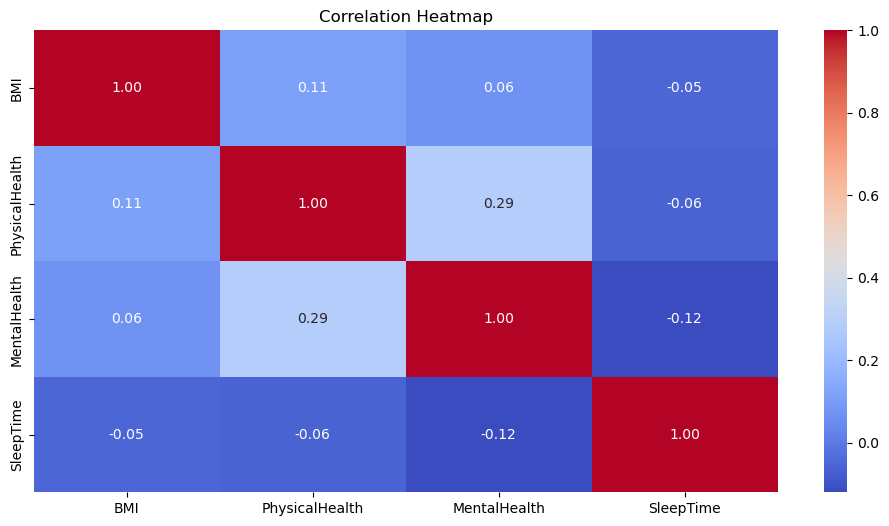

In [54]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

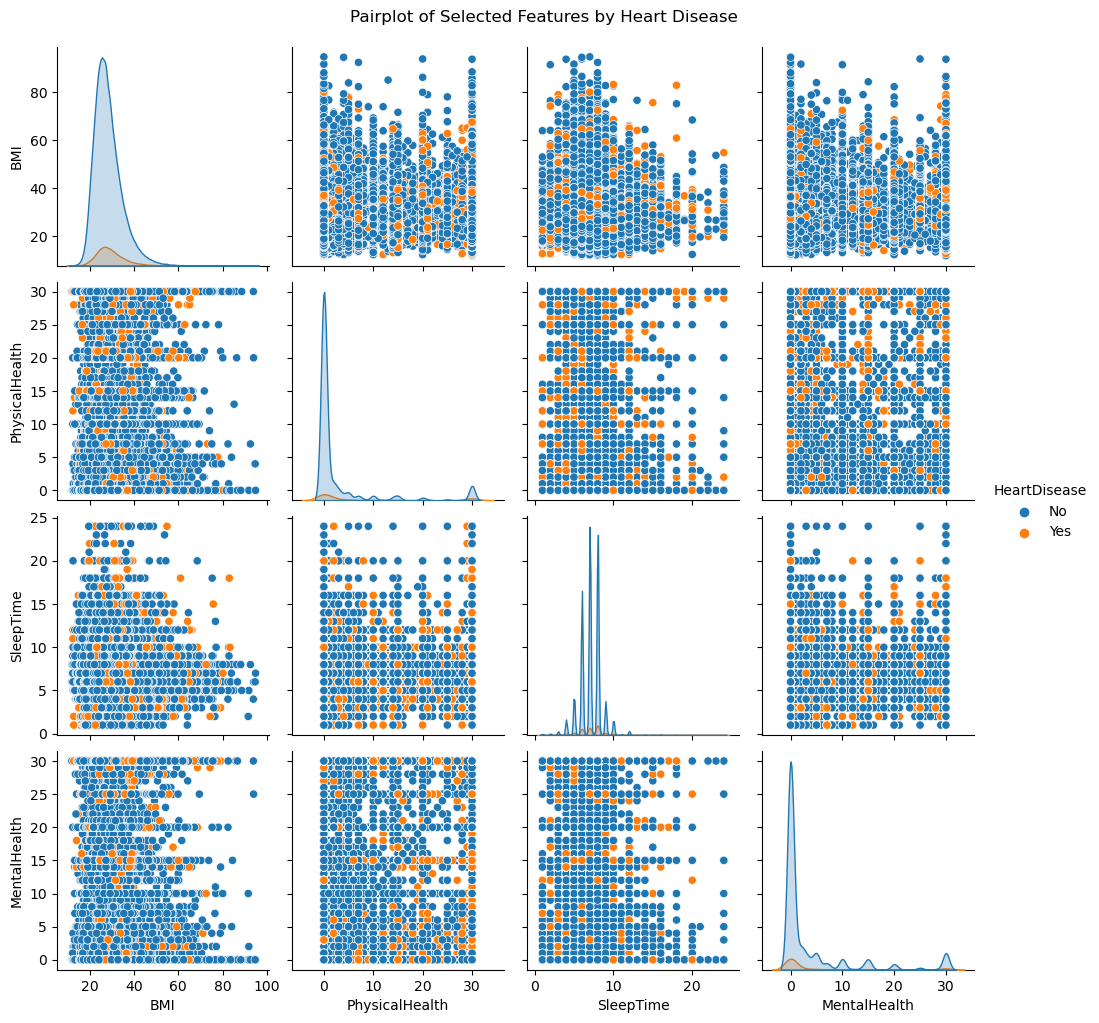

In [58]:
# Pairplot for selected features
selected_features = ['BMI', 'PhysicalHealth', 'SleepTime', 'MentalHealth', 'HeartDisease']
sns.pairplot(df[selected_features], hue='HeartDisease', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by Heart Disease", y=1.02)
plt.show()

## 2. Difference in heart disease likelihood between smokers and non-smokers

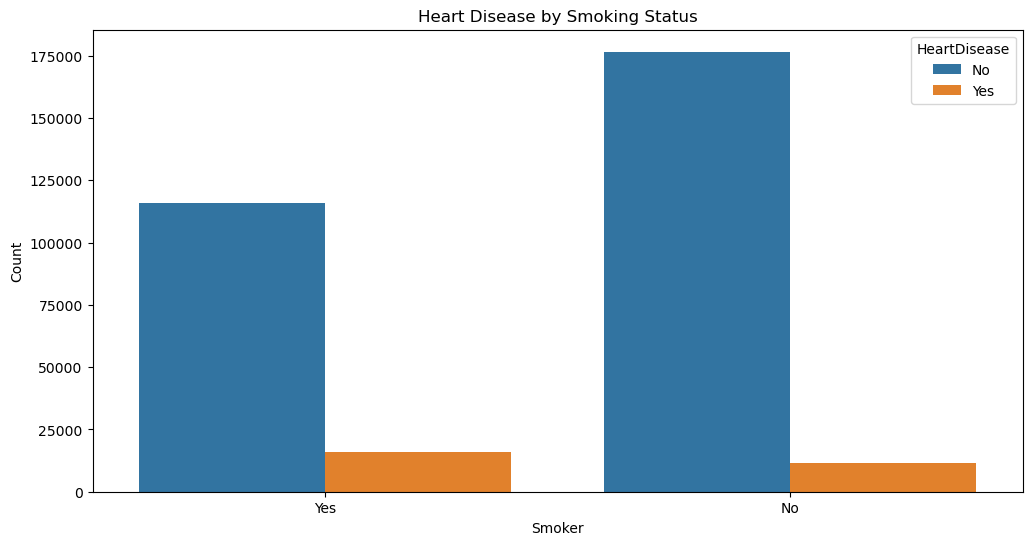

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Smoking", hue="HeartDisease", data=df)
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Heart Disease by Smoking Status")
plt.show()

## 3. Heart disease incidence among heavy drinkers, non-drinkers, and moderate drinkers

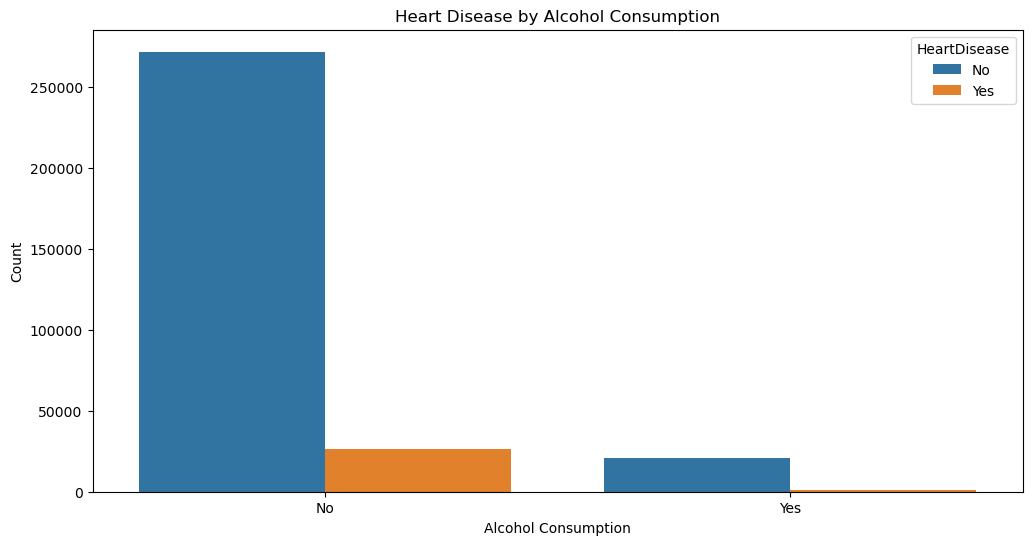

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x="AlcoholDrinking", hue="HeartDisease", data=df)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.title("Heart Disease by Alcohol Consumption")
plt.show()

## 4. Reporting of heart disease across age categories

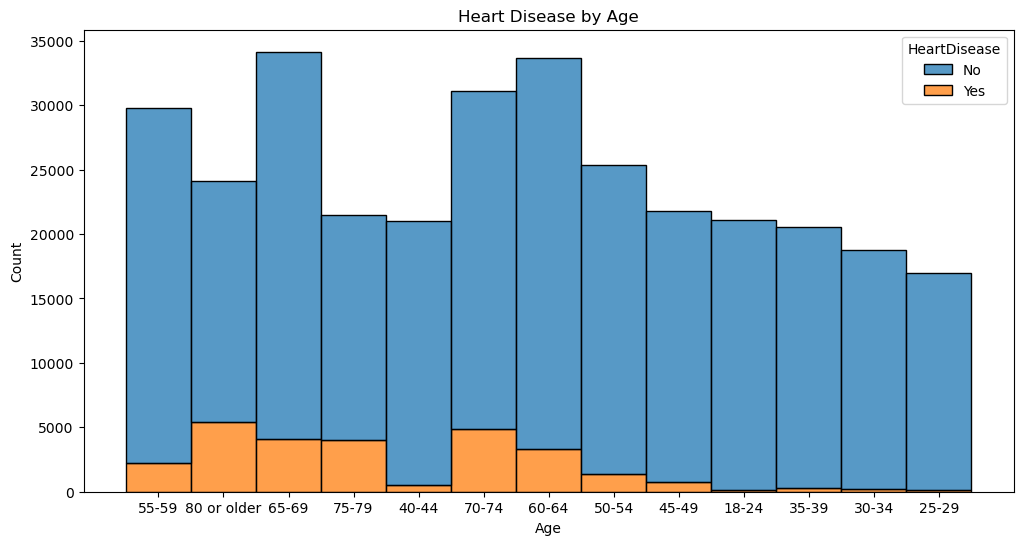

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="AgeCategory", hue="HeartDisease", multiple="stack", bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Heart Disease by Age")
plt.show()

## 5. Heart disease prevalence between males and females

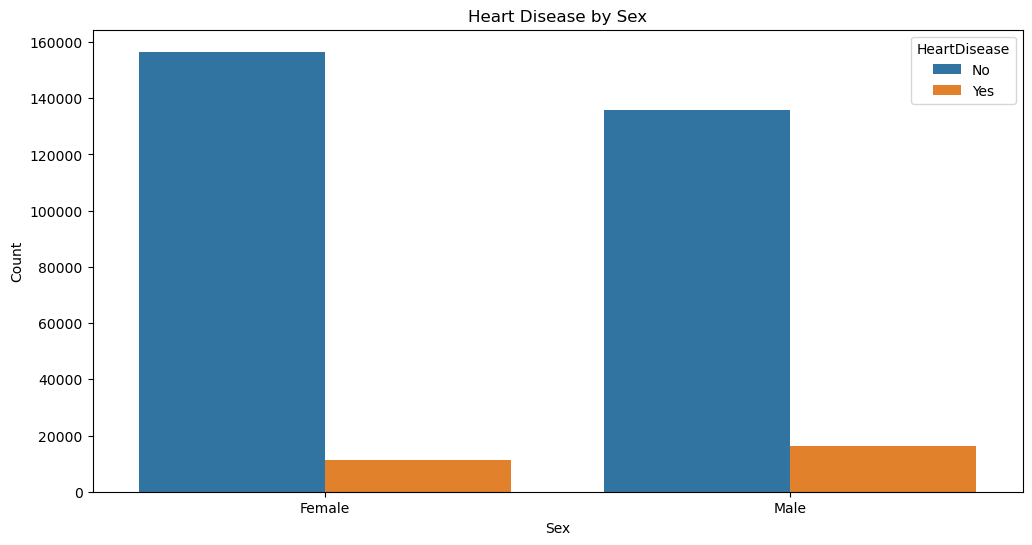

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Sex", hue="HeartDisease", data=df)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Heart Disease by Sex")
plt.xticks([0, 1], ["Female", "Male"])
plt.show()

## 6. Correlation between days of poor mental health and heart disease

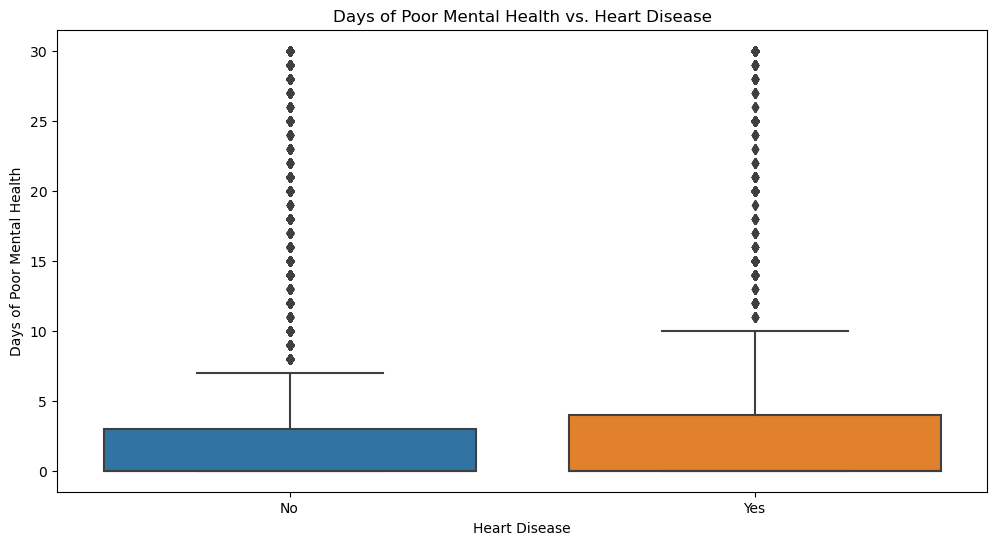

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="HeartDisease", y="MentalHealth", data=df)
plt.xlabel("Heart Disease")
plt.ylabel("Days of Poor Mental Health")
plt.title("Days of Poor Mental Health vs. Heart Disease")
plt.show()

## 7. Correlation between days of poor physical health and heart disease

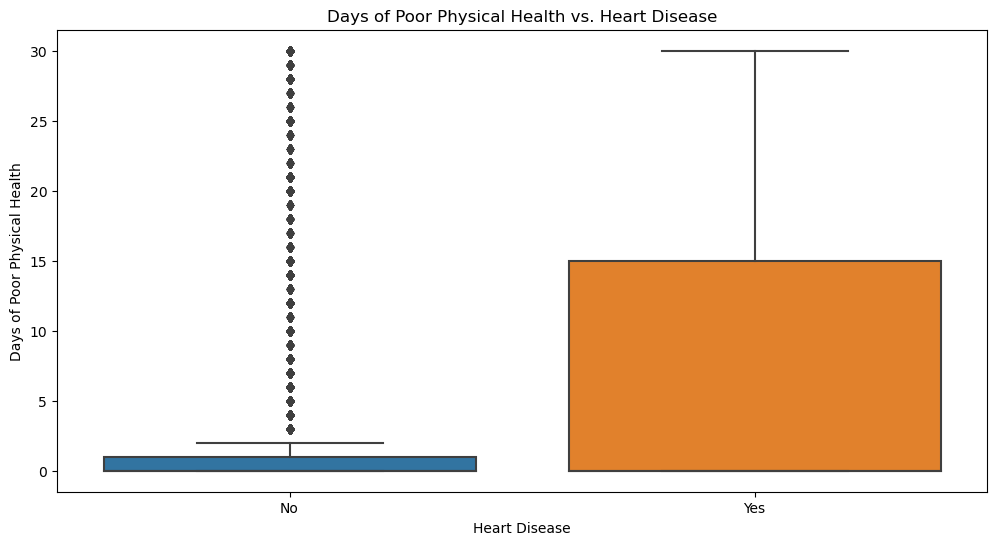

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="HeartDisease", y="PhysicalHealth", data=df)
plt.xlabel("Heart Disease")
plt.ylabel("Days of Poor Physical Health")
plt.title("Days of Poor Physical Health vs. Heart Disease")
plt.show()

## 8. Relationship between physical activity and heart disease

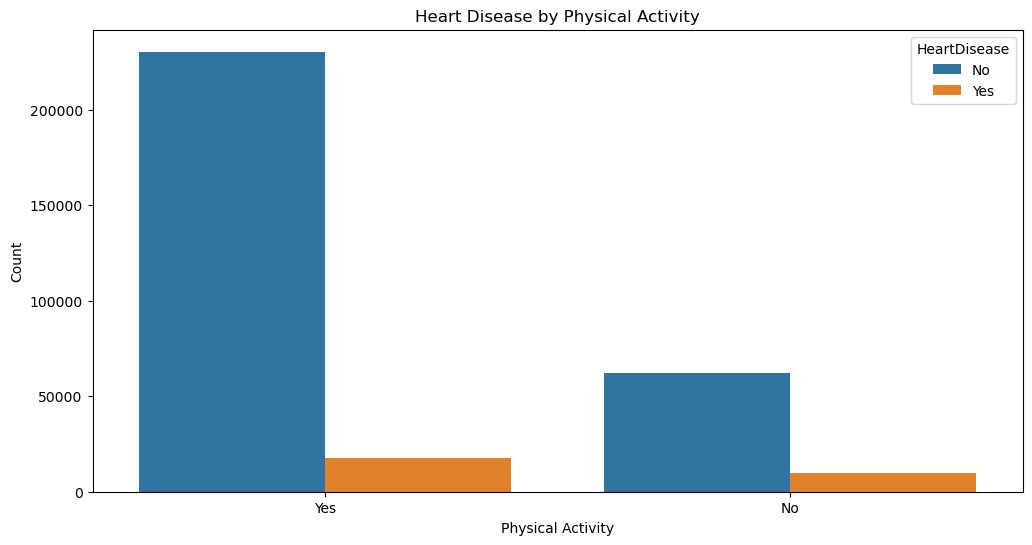

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x="PhysicalActivity", hue="HeartDisease", data=df)
plt.xlabel("Physical Activity")
plt.ylabel("Count")
plt.title("Heart Disease by Physical Activity")
plt.show()

## 9. Relationship between average sleep time and heart disease

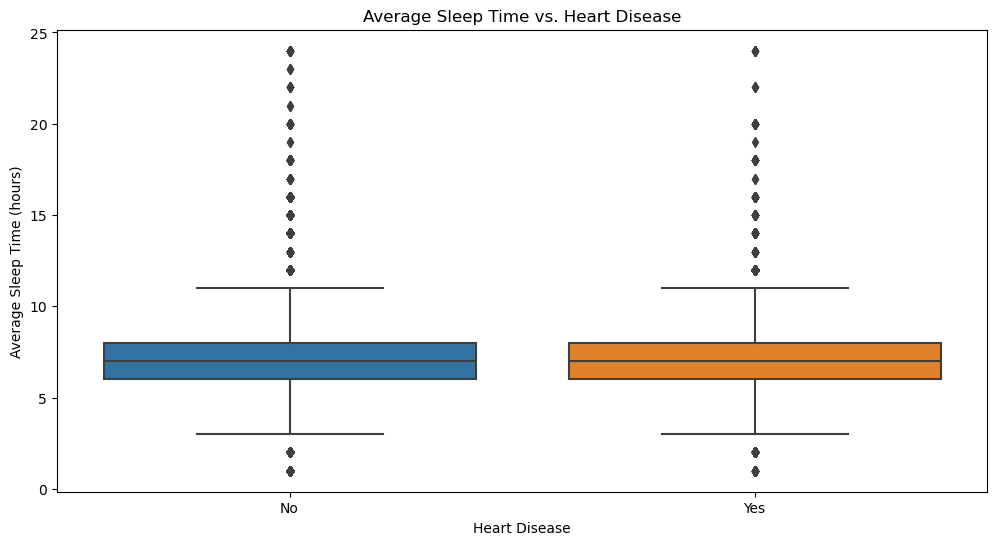

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="HeartDisease", y="SleepTime", data=df)
plt.xlabel("Heart Disease")
plt.ylabel("Average Sleep Time (hours)")
plt.title("Average Sleep Time vs. Heart Disease")
plt.show()

## 10. Prevalence of heart disease in respondents with diabetes, stroke, or kidney disease

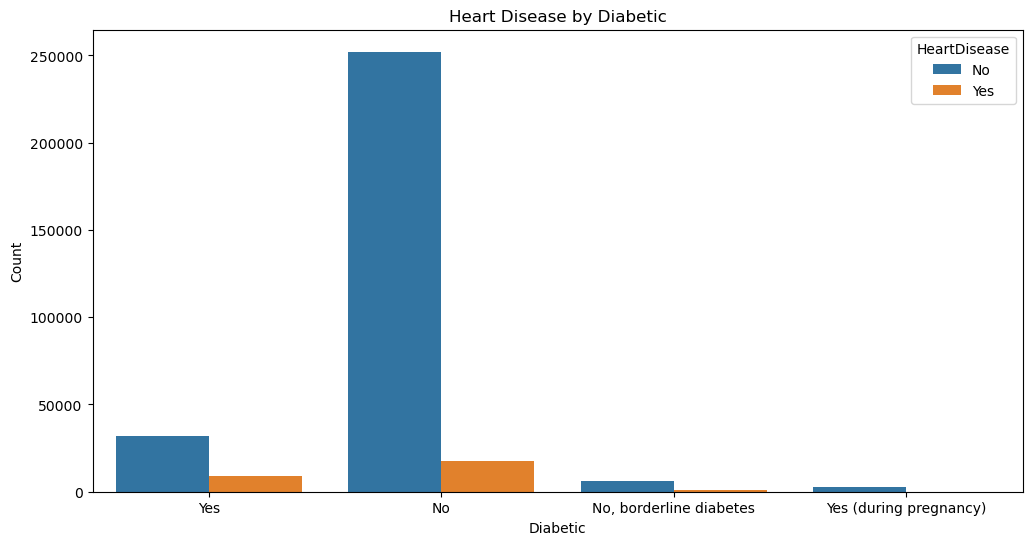

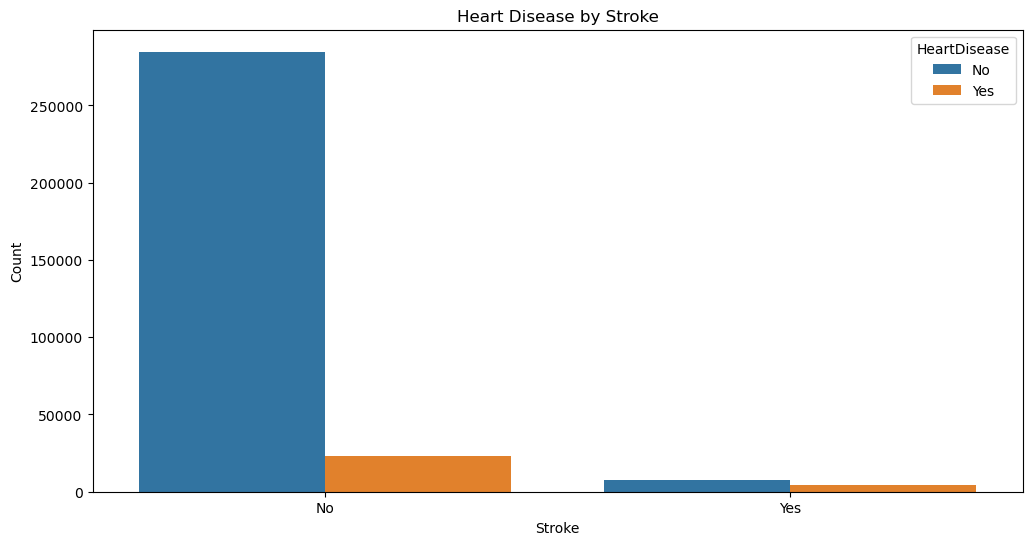

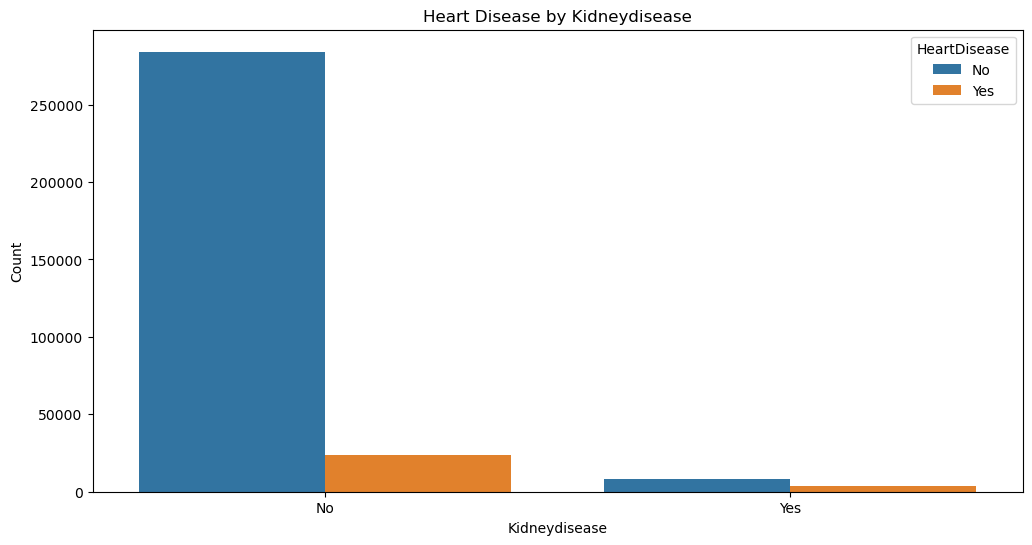

In [70]:
comorbidities = ["Diabetic", "Stroke", "KidneyDisease"]
for condition in comorbidities:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=condition, hue="HeartDisease", data=df)
    plt.xlabel(condition.capitalize())
    plt.ylabel("Count")
    plt.title(f"Heart Disease by {condition.capitalize()}")
    plt.show()

## 11. General health rating by respondents with and without heart disease

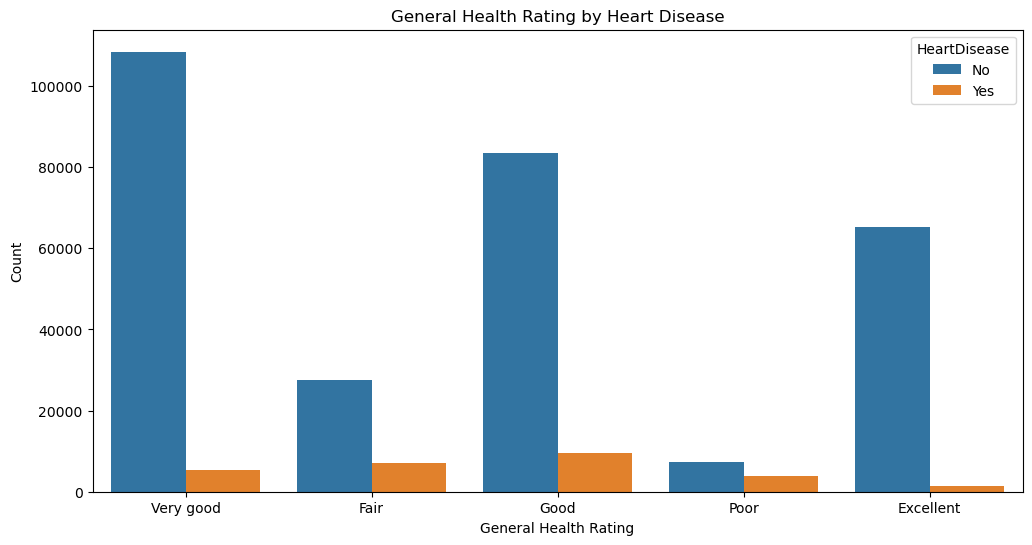

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x="GenHealth", hue="HeartDisease", data=df)
plt.xlabel("General Health Rating")
plt.ylabel("Count")
plt.title("General Health Rating by Heart Disease")
plt.show()

## 12. Reporting of difficulty in walking or climbing stairs by respondents with and without heart disease

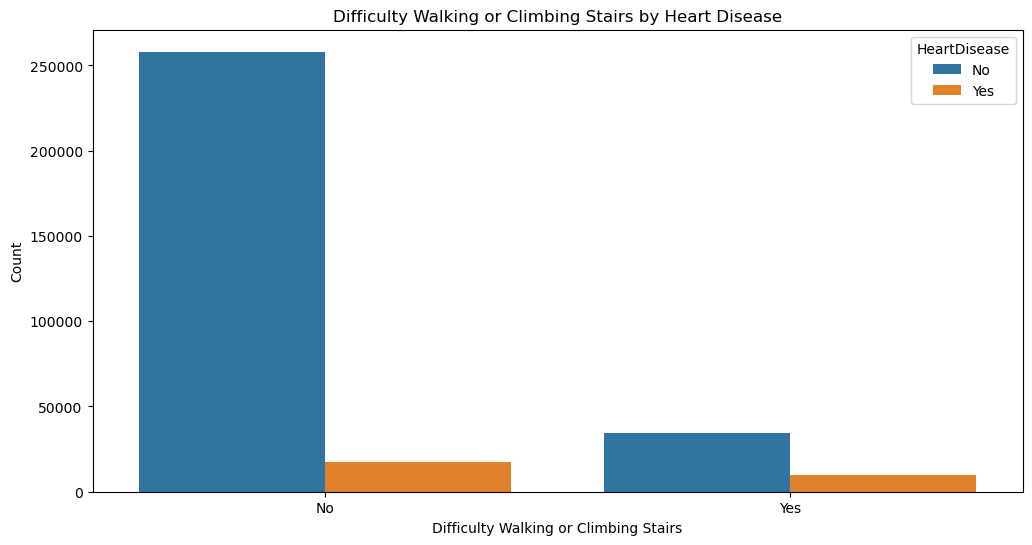

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x="DiffWalking", hue="HeartDisease", data=df)
plt.xlabel("Difficulty Walking or Climbing Stairs")
plt.ylabel("Count")
plt.title("Difficulty Walking or Climbing Stairs by Heart Disease")
plt.show()

## 13. Heart disease prevalence in respondents who have reported skin cancer

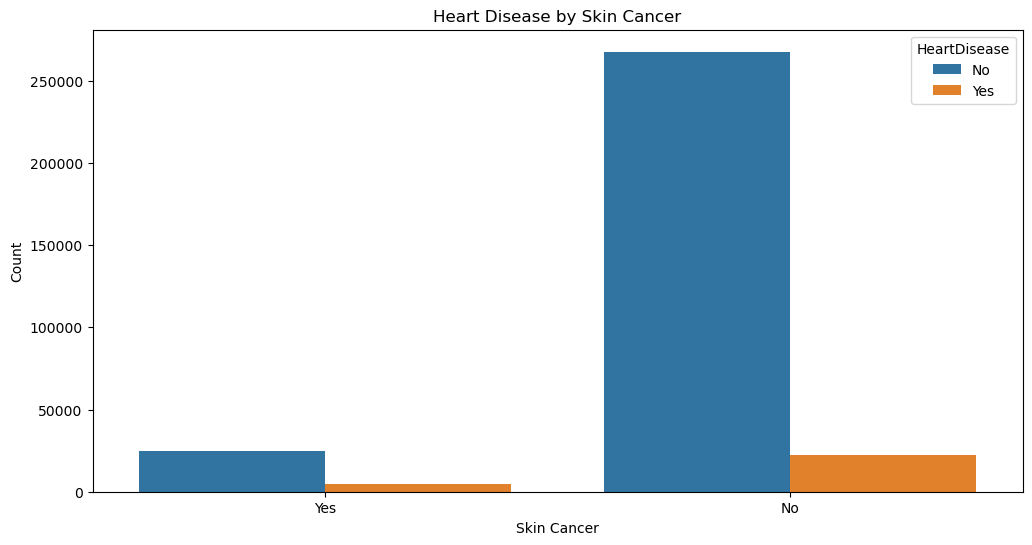

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(x="SkinCancer", hue="HeartDisease", data=df)
plt.xlabel("Skin Cancer")
plt.ylabel("Count")
plt.title("Heart Disease by Skin Cancer")
plt.show()

## 14. Demographic or behavioral groups for heart health awareness campaigns

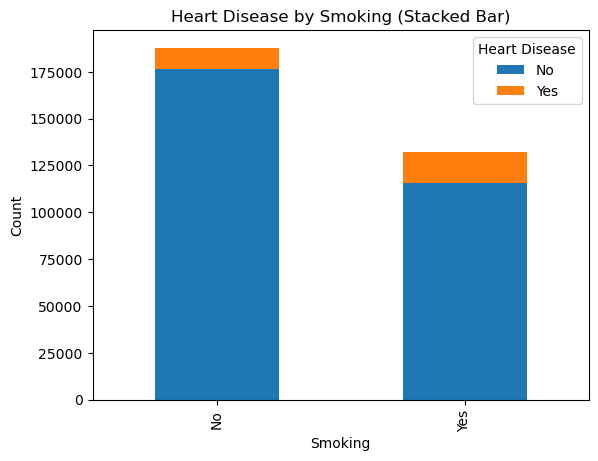

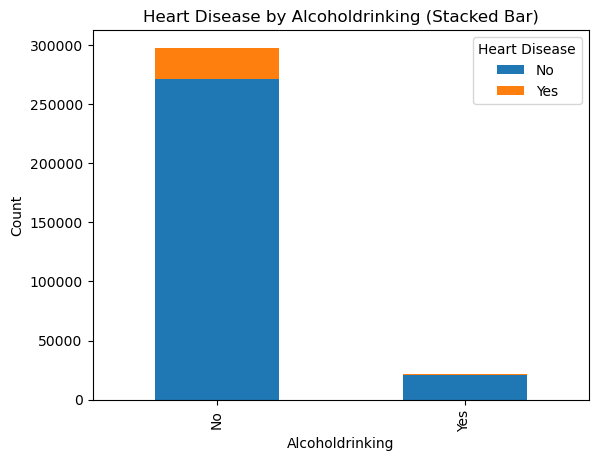

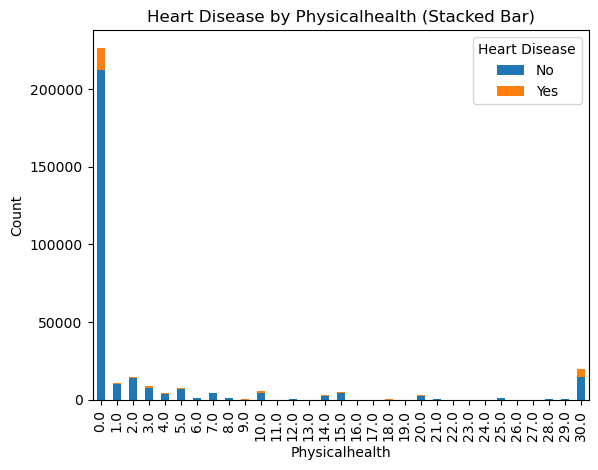

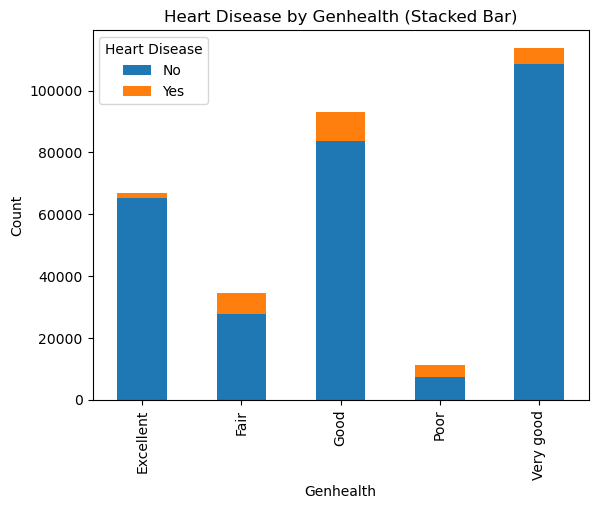

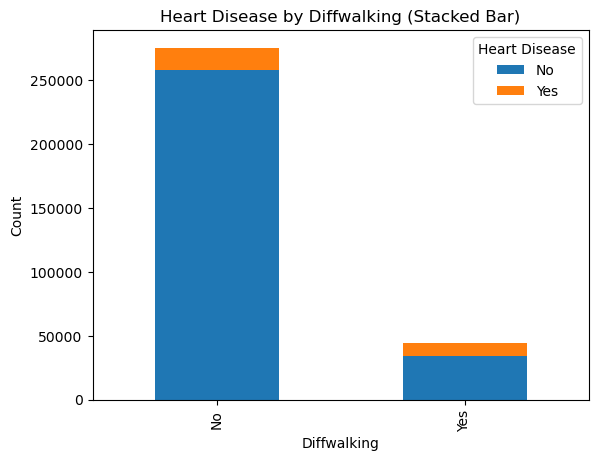

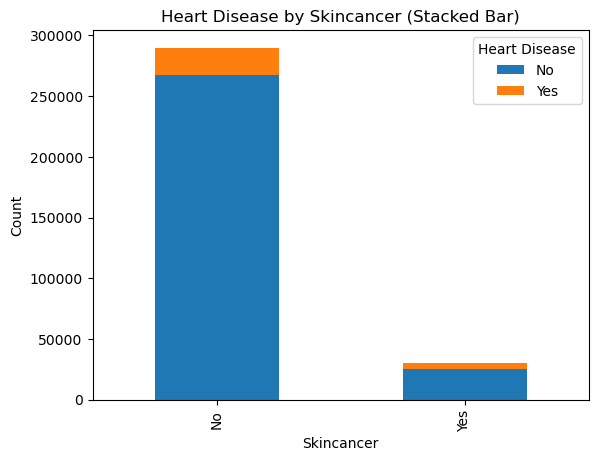

In [81]:
# Stacked bar chart for various factors
factors = ['Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'GenHealth', 'DiffWalking', 'SkinCancer']

for factor in factors:
    factor_counts = df.groupby([factor, 'HeartDisease']).size().unstack()
    factor_counts.plot(kind='bar', stacked=True)
    plt.xlabel(factor.capitalize())
    plt.ylabel("Count")
    plt.title(f"Heart Disease by {factor.capitalize()} (Stacked Bar)")
    plt.legend(title="Heart Disease", labels=["No", "Yes"])
    plt.show()

In [37]:
from scipy.stats import chi2_contingency

# Contingency table for smoking and heart disease
contingency_table = pd.crosstab(df['Smoking'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between smoking and heart disease.")
else:
    print("There is no significant association between smoking and heart disease.")

Chi-squared statistic: 3713.0331469808216
P-value: 0.0
There is a significant association between smoking and heart disease.


In [82]:
# Contingency table for alcohol drinking and heart disease
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between alcohol drinking and heart disease.")
else:
    print("There is no significant association between alcohol drinking and heart disease.")

Chi-squared statistic: 328.64916890132054
P-value: 1.892352227090306e-73
There is a significant association between alcohol drinking and heart disease.


In [83]:
# Contingency table for physical health and heart disease
contingency_table = pd.crosstab(df['PhysicalHealth'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between physical health and heart disease.")
else:
    print("There is no significant association between physical health and heart disease.")

Chi-squared statistic: 9735.616088101568
P-value: 0.0
There is a significant association between physical health and heart disease.


In [87]:
# Contingency table for general health and heart disease
contingency_table = pd.crosstab(df['GenHealth'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between general health and heart disease.")
else:
    print("There is no significant association between general health and heart disease.")

Chi-squared statistic: 21542.177361455
P-value: 0.0
There is a significant association between general health and heart disease.


In [86]:
# Contingency table for difficulty in walking and heart disease
contingency_table = pd.crosstab(df['DiffWalking'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between difficulty in walking and heart disease.")
else:
    print("There is no significant association between difficulty in walking and heart disease.")

Chi-squared statistic: 12951.153005437296
P-value: 0.0
There is a significant association between difficulty in walking and heart disease.


In [88]:
# Contingency table for skin cancer and heart disease
contingency_table = pd.crosstab(df['SkinCancer'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between skin cancer and heart disease.")
else:
    print("There is no significant association between skin cancer and heart disease.")

Chi-squared statistic: 2783.640539757866
P-value: 0.0
There is a significant association between skin cancer and heart disease.


In [89]:
# Contingency table for kidney disease and heart disease
contingency_table = pd.crosstab(df['KidneyDisease'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between kidney disease and heart disease.")
else:
    print("There is no significant association between kidney disease and heart disease.")

Chi-squared statistic: 6739.226167871357
P-value: 0.0
There is a significant association between kidney disease and heart disease.


In [90]:
# Contingency table for asthama and heart disease
contingency_table = pd.crosstab(df['Asthma'], df['HeartDisease'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between asthama and heart disease.")
else:
    print("There is no significant association between asthama and heart disease.")

Chi-squared statistic: 548.8508413264418
P-value: 2.2386144306283177e-121
There is a significant association between asthama and heart disease.
